### Steps:
 1. Converting position into decimal degress
 2. Calculating angular distance
 3. Working with databases: Bright Source Sameple survey [BSS](https://https://cdsarc.u-strasbg.fr/viz-bin/Cat?J/MNRAS/384/775#/article) (dat) and SuperCOSMOS (csv)
 4. Finding the object in BSS catalogue which is closest to certain positions  
 5. Full crossmatching between the two databases

## Task i - Converting position to decimal degrees

Write two functions, one that converts right ascension from HMS to decimal degrees, called ```hms2dec```, and another that converts declination from DMS to decimal degrees, called ```dms2dec```.

Right ascension is always an angle from 0 to 24 hours and declination is always an angle from -90° to +90°.

In [254]:
def hms2dec(arg1, arg2, arg3):
  sec = arg3 / (60*60)
  min = arg2 / 60
  hour = arg1
  return (15*(hour + min + sec))


In [255]:
print(hms2dec(23, 12, 6))

348.025


You can convert 23 hours, 12 minutes and 6 seconds (written as 23:12:06 or 23h12m06s) to degrees like this

In [256]:
print(15*(23 + 12/60 + 6/(60*60)))

348.025


In [257]:
# convert right ascension from HMS to decimal degrees,

def hms2dec(arg1, arg2, arg3):
  sec = arg3 / (60*60)
  min = arg2 / 60
  hour = arg1
  return (15*(hour + min + sec))

# convert declination from DMS to decimal degrees

def dms2dec(arg1, arg2, arg3):
  if arg1 <0:
    return (-1*(arg1*-1 + arg2 / 60 + arg3 / (60*60)))
  else:
    return  (arg1 + arg2/60 + arg3/(60*60))

In [260]:
dms2dec(-66,5,5.1)

-66.08475

In [261]:
# check results

print(hms2dec(23, 12, 6), dms2dec(22,57,18), dms2dec(-5,31,12))

348.025 22.955 -5.52


### Additional note:

The ```abs()```function returns the absolute value of the specified number.

The use of the ```abs()``` function has converted the negative numbers into positive ones. For the positive numbers, there has been no change.

Remember that the absolute value of a real number refers to its distance from 0 and is known as magnitude. As magnitude is just a distance, it will always be positive.

The ```abs()``` function works with integers, floats, and complex numbers, so it should keep you covered in any situation where you may need to apply it.

## Task ii - Calculating Angular Distance

Write a function called ```angular_dist``` that calculates the angular distance between any two points on the celestial sphere given their right ascension and declination.

Your function should take arguments in decimal degrees and return the distance in decimal degrees too.

In [ ]:
# Note to self
# Keep in mind that NumPy trigonometric functions only take radians as input
# Remember to convert degrees to radians
# database is in degrees

Game plan:


> 1.   Convert degrees to radians to feed into numpy
> 2.   Calculation using numpy function
> 3.   Convert back to degrees







In [262]:
# write a function that calculates the angular distance between two points given their RA and DEC

def angular_dist(ra1, dec1, ra2, dec2):
  import numpy as np

  #convert RA and DEC degrees to radians
  r1 = np.radians(ra1)
  d1 = np.radians(dec1)
  r2 = np.radians(ra2)
  d2 = np.radians(dec2)
    #return r1, d1, r2, d2

  # pass through calculations
  b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1 - r2)/2)**2
  a = np.sin(np.abs(d1 - d2)/2)**2
  d = 2*np.arcsin(np.sqrt(a + b))

  # convert back to degrees
  adis_deg = np.degrees(d)
  return adis_deg

In [263]:
print(angular_dist(21.07, 0.1, 21.15, 8.2))

8.100392318146504


In [264]:
angular_dist(10.3, -3, 24.3, -29)

29.208498180546595

## Task iii - Working with Catalogues

Write ```import_bss``` and ```import_super``` functions that import the AT20G BSS and SuperCOSMOS catalogues.

Each function should return a list of tuples containing the object's ID (an integer) and the coordinates in degrees. The object ID should be the row of the object in the catalogue, starting at 1.

Your functions should work like this:

```import_bss()```
<br>
```[(1, 1.1485416666666666, -47.60530555555556),
 (2, 2.6496666666666666, -30.463416666666667),
 (3, 2.7552916666666665, -26.209194444444442)]```

The files ```bss.dat``` and ```super.csv``` contain only the first 3 rows of the respective full catalogues, but your function should work with any number of entries in either catalogue. [BSS ReadMe](https://cdsarc.u-strasbg.fr/ftp/J/MNRAS/384/775/ReadMe).

In [265]:
# pulling data into numpy array from dat file
import numpy as np
data_test = np.loadtxt('https://cdsarc.u-strasbg.fr/ftp/J/MNRAS/384/775/table2.dat', usecols=range(1,7))
data_test

array([[  0.  ,   4.  ,  35.65, -47.  ,  36.  ,  19.1 ],
       [  0.  ,  10.  ,  35.92, -30.  ,  27.  ,  48.3 ],
       [  0.  ,  11.  ,   1.27, -26.  ,  12.  ,  33.1 ],
       ...,
       [ 23.  ,  58.  ,   2.13, -45.  ,  55.  ,  18.8 ],
       [ 23.  ,  59.  ,   4.7 , -60.  ,  55.  ,   1.1 ],
       [ 23.  ,  59.  ,  35.41, -31.  ,  33.  ,  44.9 ]])

In [266]:
data_test.shape, type(data_test), type(data_test[1]), type(data_test[1][1]), data_test.ndim, data_test.shape[0], data_test.shape[0]+1

((320, 6), numpy.ndarray, numpy.ndarray, numpy.float64, 2, 320, 321)

In [267]:
# write function to load bss catalogue

def import_bss():
  import numpy as np

  # load and grab data ranging from the column position 1 up until column pos 6
  data = np.genfromtxt('https://cdsarc.u-strasbg.fr/ftp/J/MNRAS/384/775/table2.dat', usecols=range(1,7))

  # placeholder
  RADecs = []

  # add a column for object id
  # generate value starting from 1, ending at the 321 (row + 1), with increment of 1
  # insert generated values at index 0 along the column (axis 1) onto the data array above
  col_data = np.insert(data, 0, np.arange(start=1, stop=data.shape[0]+1, step=1), axis=1)


  # iterate through each row
  for f in col_data:
    # identify column ID and convert strong to int
    col_ID = f[0].astype(int)

    # right ascension calculation to decimal degrees
    ra_hour = f[1]
    ra_min = f[2] / 60
    ra_sec =  f[3] / (60*60)
    ra_sec = f[3]/ (60*60)
    Ra_deg = (15*(ra_hour + ra_min + ra_sec))

    # declination calculation to decimal degrees
    dec_deg = None
    if f[4] <0:
      dec_deg = (-1*(f[4]*-1 + f[5]/60 + f[6]/(60*60)))
    else:
      dec_deg = (f[4] + f[5]/60 + f[6]/(60*60))

    # combine the values and apppend to RAs placeholder
    RADecs.append([col_ID, Ra_deg, dec_deg])

    # convert data type from list to tuple via list comprehension
    holder_tuple_bss = [tuple(row) for row in RADecs]

  return holder_tuple_bss

In [268]:
# check first 10 result
import_bss()[:10]

[(1, 1.1485416666666666, -47.60530555555556),
 (2, 2.6496666666666666, -30.463416666666667),
 (3, 2.7552916666666665, -26.209194444444442),
 (4, 3.2495416666666666, -39.907333333333334),
 (5, 6.4549166666666675, -26.03686111111111),
 (6, 6.568333333333333, -35.21372222222222),
 (7, 9.561333333333334, -24.98386111111111),
 (8, 12.497833333333332, -57.641),
 (9, 12.789583333333333, -42.442361111111104),
 (10, 14.694333333333335, -56.9865)]

The SuperCOSMOS all-sky catalogue is a catalogue of galaxies generated from several visible light surveys.

The original data is available on this page in a package called SCOS_XSC_mCl1_B21.5_R20_noStepWedges.csv.gz. Because this catalogue is so large, we've cut it down for these activities. The cut down version of the file will be named super.csv.

The catalogue uses a comma-separated value (CSV) format. Aside from the first row, which contains column labels, the format is:

1.   Right ascension in decimal degrees
2.   Declination in decimal degrees
3.   Other data, including magnitude and apparent shape


In [14]:
# upload csv to colab
# import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving super.csv to super.csv


In [269]:
# load file for first look
import numpy as np
cat_check = np.loadtxt('super.csv', dtype=str)
cat_check

array(['RA,Dec,sigRA,sigDec,epoch,muAcosD,muD,sigMuAcosD,sigMuD,chi2,classMagB,classMagR1,classMagR2,classMagI,meanClass,classB,classR1,classR2,classI,ellipB,ellipR1,ellipR2,ellipI,qualB,qualR1,qualR2,qualI',
       '1.0583407,-52.9162402,1.2605071E-05,1.3178029E-05,1990.9344,-14.794838,-22.16756,7.242738,7.881182,5.027039,14.072,12.997,13.293,12.74,1,1,1,1,1,0.182453,0.234902,0.213206,0.19472,16,16,16,16',
       '2.6084425,-41.5005753,2.0626481E-05,2.0626481E-05,1990.0508,-1.144597,-0.50977,10.397644,11.014809,0.245407,18.84,18.834,18.387,18.929,2,2,2,2,2,0.106605,0.112284,0.137899,0.091846,0,0,0,0',
       '2.7302499,-27.706955,1.9480565E-05,1.8334649E-05,1982.9619,8.661513,1.872858,11.983931,11.506061,0.281173,19.188,18.723,18.74,18.993,2,2,2,2,1,0.117095,0.174671,0.020132,0.280859,0,0,0,0'],
      dtype='<U198')

In [270]:
super_catalogue = np.loadtxt('super.csv', delimiter=',',skiprows=1, usecols=[0,1], dtype=str)
print(super_catalogue)

[['1.0583407' '-52.9162402']
 ['2.6084425' '-41.5005753']
 ['2.7302499' '-27.706955']]


In [271]:
# use insert + arange to add the column ID

col_data_cat1 = np.insert(super_catalogue, 0, np.arange(start=1, stop=super_catalogue.shape[0]+1, step=1), axis=1)
col_data_cat1

array([['1', '1.0583407', '-52.9162402'],
       ['2', '2.6084425', '-41.5005753'],
       ['3', '2.7302499', '-27.706955']], dtype='<U11')

In [ ]:
# data_cat1 = np.char.replace(col_data_cat1,'"','') #this part is needed here but not in grok, but not needed with updated data
# data_cat1

array([['1', '1.0583407', '-52.9162402'],
       ['2', '2.6084425', '-41.5005753'],
       ['3', '2.7302499', '-27.706955']], dtype='<U11')

In [272]:
# write import_super function

def import_super():
  import numpy as np

  # load data, separate each value out by ',', skip the first row, and grab only RA and Dec column
  super_cat = np.loadtxt('super.csv', delimiter=',',skiprows=1, usecols=[0,1], dtype=str)

  # generate value starting from 1, ending at the 3 (no. of row + 1), with increment of 1
  # insert generated values at index 0 along the column (axis 1) onto the data array above
  # define as super_data_id
  super_data_id = np.insert(super_cat, 0, np.arange(start=1, stop=super_cat.shape[0]+1, step=1), axis=1)

  # data = np.char.replace(col_data_id,'"','') #this part is needed here but not in grok

  holder = []
  for d in super_data_id:
  #for d in data:
    # convert column ID, RA, and DEC from string to int/float and append to holder
    col_ID = d[0].astype(int)
    ra = d[1].astype(float)
    dec = d[2].astype(float)
    holder.append([col_ID, ra, dec])

    # convert data type from list to tuple via list comprehension
    holder_tuple_super = [tuple(row) for row in holder]
  return holder_tuple_super

In [273]:
import_super()

[(1, 1.0583407, -52.9162402),
 (2, 2.6084425, -41.5005753),
 (3, 2.7302499, -27.706955)]

In [274]:
# trying out a different way; enumerate in order to get index number (Col_ID)
res = []
for i, row in enumerate(super_catalogue, 1):
  res.append((i, row[0], row[1])) #combine index, value in row0, row1, and row2 together
print(res)

[(1, '1.0583407', '-52.9162402'), (2, '2.6084425', '-41.5005753'), (3, '2.7302499', '-27.706955')]


In [275]:
# check results

bright_source = import_bss()
supercosmos = import_super()

bright_source[:5], supercosmos

([(1, 1.1485416666666666, -47.60530555555556),
  (2, 2.6496666666666666, -30.463416666666667),
  (3, 2.7552916666666665, -26.209194444444442),
  (4, 3.2495416666666666, -39.907333333333334),
  (5, 6.4549166666666675, -26.03686111111111)],
 [(1, 1.0583407, -52.9162402),
  (2, 2.6084425, -41.5005753),
  (3, 2.7302499, -27.706955)])

### Learnings:

*   How to insert - ```np.insert(x)```
*   Changing data type - ```f[0].astype(int)```
*   ```genfromtxt```, ```loadtxt```

>>> Note, ```genfromtxt``` will create 1D array esp if you have mutilple data types
>>> <p>To access the column then, you have to call the column as there is only 1D, i.e. call ```a['f2']``` for third column</p>


*   Converting array to tuple using for loop - ```[tuple(row) for row in holder]```
*   Character replace - ```np.char.replace(x)```
*   Checking shape & size - ```np.shape(arr), np.size(arr)```
*   Use ```enumerate``` to get indices + loop through - ```for i, row in enumerate(arr, 1):```



### Task iv - Find the closest object

Write a ```find_closest``` function that takes a catalogue and the position of a target source input (a right ascension and declination) and finds the closest match for the target source within the BSS catalogue.

Your function should return the ID of the closest object and the distance to that object.

The right ascension and declination are in degrees. The catalogue list has been loaded by import_bss from the previous question. The full 320 object BSS catalogue is contained in ```bss.dat``` for you to test your code on.

Here's an example of how your function should work:

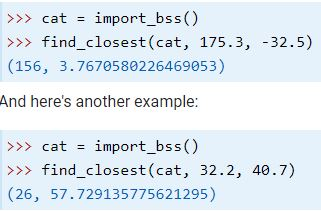

In [276]:
# write find_closest function

def find_closest(data, ra1, dec1): #input is in degrees
  import numpy as np

  # convert the RA and Dec inputs from degrees to radians
  r1 = np.radians(ra1)
  d1 = np.radians(dec1)

  # convert catalogue's degrees to radian
  rad_cat = []
  for i in data:
    r2 = np.radians(i[1])
    d2 = np.radians(i[2])
    rad_cat.append([i[0],r2,d2])
  #return rad_cat

  # calculating the difference between input and catalogue
  calc = []
  for j in rad_cat:
    b = np.cos(d1)*np.cos(j[2])*np.sin(np.abs(r1 - j[1])/2)**2
    a = np.sin(np.abs(d1 - j[2])/2)**2
    d = 2*np.arcsin(np.sqrt(a + b))
    ang_dis_deg = np.degrees(d)
    calc.append([j[0], ang_dis_deg])
  #return calc

  # selecting min value along the second column of the calculation result above
  # output in row number and then map it against the calc table
  min_value = np.argmin(calc, axis=0)[1]
  return calc[min_value]

In [277]:
# check result

cat = import_bss()
find_closest(cat, 175.3, -32.5)

[156, 3.7670580226469053]

In [278]:
# check result

cat = import_bss()
find_closest(cat, 32.2, 40.7)

[26, 57.729135775621295]

### Learnings:

*   Find min value - ```np.argmin(x)```

> Note, ```axis```  : [int, optional] Along a specified axis like 0 for column or 1 for row
><br>```axis=1``` we instruct NumPy to search for the minimum value in each “row” of the array</br>
><br>```axis = 0``` By modifying the axis= parameter to pass in 0, we can find the indices of the minimum values searching column-wise</br>
><br>To select specific column, simply add position after the clause - ```np.argmin(array, axis=0)[1]```</br>








## Task v - Full Crossmatching

Write a ```crossmatch``` function that crossmatches two catalogues within a maximum distance. It should return a list of <b>matches</b> and <b>no-matches</b> for the first catalogue against the second.

* The list of matches contains tuples of the first and second catalogue object IDs and their distance.

* The list of no-matches contains the unmatched object IDs from the first catalogue only.

Both lists should be ordered by the first catalogue's IDs.

The BSS and SuperCOSMOS catalogues will be given as input arguments, each in the format you’ve seen previously. The maximum distance is given in decimal degrees.

The process you should follow is:

1.   Select an object from the BSS catalogue;
2.   Go through all the objects in SuperCOSMOS and find the ones within the max distance to the BSS object;
3.   If the objects are close enough, record the match;
4.   Repeat 1-3 for all the other objects in the BSS catalogue.



In [279]:
# Import bss function

# import libraries
import numpy as np

def import_bss_cm():

  # load and grab data ranging from the column position 1 up until column pos 6
  data = np.genfromtxt('https://cdsarc.u-strasbg.fr/ftp/J/MNRAS/384/775/table2.dat', usecols=range(1,7))

  # placeholder
  RADecs = []

  # generate value starting from 1, ending at the 321 (row + 1), with increment of 1
  # insert generated values at index 0 along the column (axis 1) onto the data array above
  col_data = np.insert(data, 0, np.arange(start=1, stop=data.shape[0]+1, step=1), axis=1)

  # iterate through each row
  for f in col_data:
    # identify column ID and convert strong to int
    col_ID = f[0].astype(int)

    # right ascension calculation to decimal degrees
    ra_hour = f[1]
    ra_min = f[2] / 60
    ra_sec =  f[3] / (60*60)
    ra_sec = f[3]/ (60*60)
    Ra_deg = (15*(ra_hour + ra_min + ra_sec))

    # declination calculation to decimal degrees
    dec_deg = None
    if f[4] <0:
      dec_deg = (-1*(f[4]*-1 + f[5]/60 + f[6]/(60*60)))
    else:
      dec_deg = (f[4] + f[5]/60 + f[6]/(60*60))

    # collate the values
    # turn degrees to radians in prep for angular distance calculation
    # append to RADecs placeholder
    RADecs.append([col_ID, np.radians(Ra_deg), np.radians(dec_deg)])

    # convert data type from list to tuple via list comprehension
    holder_tuple_bss = [tuple(row) for row in RADecs]
  return holder_tuple_bss

In [25]:
# bring in super_full data

from google.colab import files
data_to_load = files.upload()

Saving super_full.csv to super_full.csv


In [280]:
# Import super function

def import_super_cm():

  # load data, separate each value out by ',', skip the first row, and grab only RA and Dec column
  super_cat = np.loadtxt('super_full.csv', delimiter=',',skiprows=1, usecols=[0,1], dtype=str)

  # generate value starting from 1, ending at the 3 (no. of row + 1), with increment of 1
  # insert generated values at index 0 along the column (axis 1) onto the data array above
  # define as super_data
  super_data_id = np.insert(super_cat, 0, np.arange(start=1, stop=super_cat.shape[0]+1, step=1), axis=1)

  holder = []
  for d in super_data_id:
    # convert column ID, RA, and DEC from string to int and append to holder
    col_ID = d[0].astype(int)
    ra = d[1].astype(float)
    dec = d[2].astype(float)

    # turning degrees into radians
    holder.append([col_ID, np.radians(ra), np.radians(dec)])

    # convert data type from list to tuple via list comprehension
    holder_tuple_super = [tuple(row) for row in holder]
  return holder_tuple_super

In [281]:
# crossmatch
# remember import_bss and import_super outputs are already in radians

import numpy as np

def crossmatch(catalogue_1, catalogue_2, max_dist):

  matches_prep = []
  no_matches_prep = []
  for d in catalogue_1:
    no_matches_prep.append(d[0]) #all the object IDs
    for e in catalogue_2:
      col_ID_first = d[0]
      col_ID_target = e[0]

      # pass through calculation to find out angular distance
      b = np.cos(d[2])*np.cos(e[2])*np.sin(np.abs(d[1] - e[1])/2)**2
      a = np.sin(np.abs(d[2] - e[2])/2)**2
      c = 2*np.arcsin(np.sqrt(a + b))

      # turning back to degrees as max distance is given in degrees
      ang_dis_deg = np.degrees(c)

      # if object's distance is less than max distance, then append col_id of catalogue 1, col_id of catalgue 2, and distance to the matches_pre holder
      if ang_dis_deg < max_dist:
        matches_prep.append([col_ID_first, col_ID_target, ang_dis_deg])

    # compare object ids with the matched one
    # save to variable no_matched_loop if not found in the matched list
    # [row[0] for row in matches_pre] represents first column
    no_matches = [i for i in no_matches_prep if i not in [row[0] for row in matches_prep]]

    # change data type to tuple
    matches = [tuple(row) for row in matches_prep]

  return matches, no_matches

In [282]:
# run function bss and super from above

bss_cat_cm = import_bss_cm()
super_cat_cm = import_super_cm()

In [283]:
# quick check on the shape of bss and super
a = np.array(bss_cat_cm)
b = np.array(super_cat_cm)

a.shape, b.shape

((320, 3), (500, 3))

In [284]:
# max distance of 40 arcseconds, given in degrees

max_dist = 40/3600
matches, no_matches = crossmatch(bss_cat_cm, super_cat_cm, max_dist)

print(matches)
print(len(matches))
print(no_matches[:5])
print(len(no_matches))

[(1, 2, 0.00010988610938710059), (2, 4, 0.0007649845967242495), (3, 5, 0.00020863352870707666), (4, 6, 0.00012867299967083928), (7, 11, 7.666235090011008e-05), (8, 14, 0.00020833046101750643), (9, 15, 0.0001774015026088326), (10, 17, 0.00016079604439502975), (12, 18, 0.0003493944606752222), (13, 22, 0.00012170541597764247), (14, 24, 0.008314435904852577), (15, 25, 0.00021977416884437018), (16, 26, 0.0001328286890139291), (17, 27, 3.181530427842653e-05), (18, 29, 0.00019843774684364136), (19, 30, 0.00011585178516956528), (20, 31, 0.0002627136922326124), (21, 32, 0.00039932330328371096), (22, 33, 7.36535577225557e-05), (23, 34, 0.00022280948960772594), (24, 35, 0.00015481960583649628), (25, 37, 0.0003688060288937162), (26, 39, 0.0003750312712778308), (27, 41, 0.0001183449200434592), (28, 42, 0.00012217104062974945), (30, 43, 0.0005573032265457314), (31, 44, 0.00018231015875520086), (32, 46, 0.00023219797492993673), (33, 47, 3.915629971730293e-05), (34, 48, 0.00014607219789169266), (35, 4

In [285]:
matches[:10]

[(1, 2, 0.00010988610938710059),
 (2, 4, 0.0007649845967242495),
 (3, 5, 0.00020863352870707666),
 (4, 6, 0.00012867299967083928),
 (7, 11, 7.666235090011008e-05),
 (8, 14, 0.00020833046101750643),
 (9, 15, 0.0001774015026088326),
 (10, 17, 0.00016079604439502975),
 (12, 18, 0.0003493944606752222),
 (13, 22, 0.00012170541597764247)]

### Learnings:

In [286]:
# remove duplicate within the list
a = [2,5,3,2,1,1,3,1,3]
unique_values = np.unique(a)
unique_values

array([1, 2, 3, 5])

In [287]:
# check if any IDs appears more than one
from collections import Counter

print(any(count > 1 for count in Counter([row[0] for row in matches]).values()))

True


In [288]:
# check which object matches with more than one object from SuperCOSMOS catalogue
[item for item, count in Counter(matched_obj).items() if count > 1]

[94, 102, 107, 112, 134, 135, 240]

In [ ]:
# print out the object and its count

Counter(matched_obj)

In [290]:
# check if items in no_matches appear in first column of matches
checkif = all(item in no_matches for item in [row[0] for row in matches])

In [291]:
print(checkif)

False


In [292]:
# check if identical

a=a = [2,5,3,2,1,1,3,1,3]
b=a = [2,5,3,2,1,1,3,1,3]
np.array_equal(a, b)

True